# TensorBoard

In [2]:
#Import the libraries:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
#Ignore the warnings:
import warnings
warnings.filterwarnings("ignore")
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Import the Dataset to create the Neural Network:

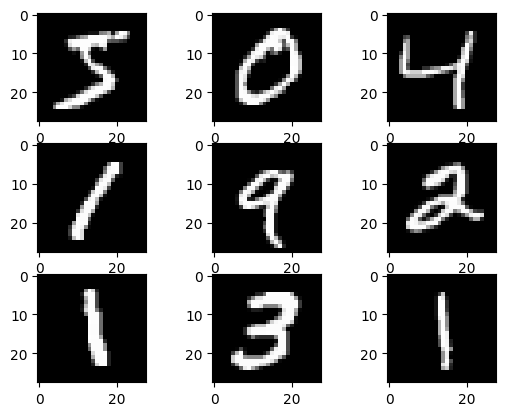

In [4]:
#Import the dataset:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_test = X_test / 255.0
X_train = X_train / 255.0

#Plot the dataset:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()    


In [6]:
#Built the Model:
from tensorflow.keras import layers
#Create the input layer:
input_layer = layers.Input(shape=(28,28,1))
#Create the CNN Model:
model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(1, 1)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [7]:
#Compile the model:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.5355 - loss: 1.3363 - val_accuracy: 0.9168 - val_loss: 0.2969
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8247 - loss: 0.5234 - val_accuracy: 0.9465 - val_loss: 0.1852
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.8708 - loss: 0.3880 - val_accuracy: 0.9592 - val_loss: 0.1463
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8877 - loss: 0.3376 - val_accuracy: 0.9645 - val_loss: 0.1251
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.8968 - loss: 0.3095 - val_accuracy: 0.9666 - val_loss: 0.1144
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9621 - loss: 0.1183
The value of loss function: 0.09945418685674667.
The value of accuracy: 0.9689000248908997.


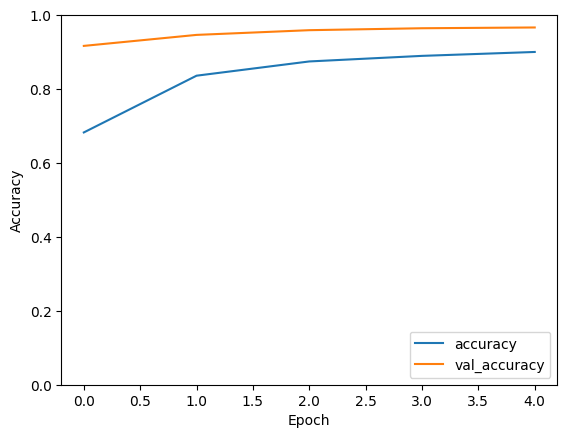

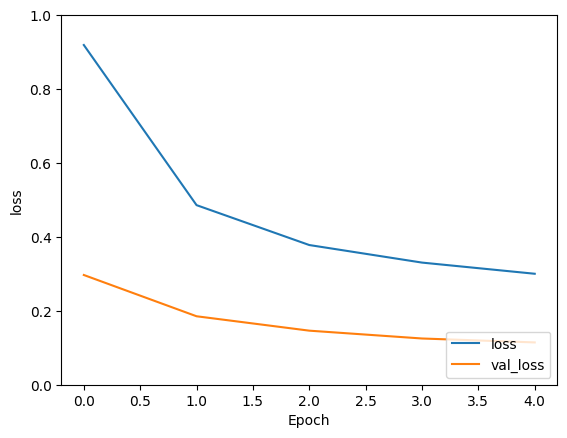

In [8]:
#Fit the model:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test, y_test)
#Print the evaluation metrics
print(f"The value of loss function: {test_loss}.")
print(f"The value of accuracy: {test_acc}.")
#Plot the accuracy and validation accuracy:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
#Plot the loss and val_loss:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


## Make the TensorBoard

In [9]:
#Built the Model:
from tensorflow.keras import layers
#Create the input layer:
input_layer = layers.Input(shape=(28,28,1))
#Create the CNN Model:
model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(1, 1)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
#Compile the model:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [13]:
# lets create the callback function 
tensorboard_callback = TensorBoard(log_dir='./logs_class_run', histogram_freq=1)
 

In [15]:
#Fit the model:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.5428 - loss: 1.3165 - val_accuracy: 0.9312 - val_loss: 0.2623
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8399 - loss: 0.4791 - val_accuracy: 0.9544 - val_loss: 0.1641
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8843 - loss: 0.3600 - val_accuracy: 0.9632 - val_loss: 0.1248
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9018 - loss: 0.3088 - val_accuracy: 0.9672 - val_loss: 0.1102
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9152 - loss: 0.2764 - val_accuracy: 0.9721 - val_loss: 0.0966


In [16]:
%load_ext tensorboard

In [19]:
# Run the tensorboard of recent log here.
%tensorboard --logdir=./logs_class_run

Reusing TensorBoard on port 6006 (pid 4464), started 0:00:09 ago. (Use '!kill 4464' to kill it.)